<a href="https://colab.research.google.com/github/Mahesharvinds/DataAnalyticsCourseWork/blob/master/Introduction_to_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting started with Sentimental Analysis using Classification**

### Loading Necessary Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading the "Rotten Tomatoes Movie Review" data set into Pandas Data Frame

In [0]:
data = pd.read_csv("train.tsv",delimiter='\t')
data = data.head(5000)

### Collecting all the adjectives and adverbs ( words that represent the sentiment ) as a separate column

In [0]:
#import nltk
#nltk.download('punkt') - Use in case not found
#nltk.download('averaged_perceptron_tagger') - Use in case not found
adjectives = []
for i in range(0,data.shape[0]):
    pos_tagged = pos_tag(word_tokenize(data.iloc[i,2]))
    string = ""
    for j in range(0,len(pos_tagged)):
        if pos_tagged[j][1] in ("JJ","JJR", "JJS", "RB", "RBR", "RBS"):
            string = string + " " + pos_tagged[j][0]
    adjectives.append(string)
data['Adjective Review'] = adjectives

### Dropping all the unnecessary columns

In [13]:
data = data.drop("PhraseId",axis=1)
data = data.drop("SentenceId",axis=1)
data = data.drop("Phrase",axis=1)
print(data.head())

   Sentiment                   Adjective Review
0          1   good also good occasionally much
1          2                               good
2          2                                   
3          2                                   
4          2                                   


### Slicing the data into Predictors and Response variables

In [0]:
predictors = data['Adjective Review']
response = data["Sentiment"]

### TFIDF Vectorization to generate Bag Of Words

In [0]:
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True,max_features=1000)
tv_features = tv.fit_transform(predictors)

### Splitting the data into Training Set and Test Set

In [0]:
train_predictors, test_predictors, train_response, test_response = train_test_split(tv_features, response, random_state = 0)

### Building an RandomForest Classifier Model using SKLearn

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_features = 10).fit(train_predictors, train_response)

### Predicting the Sentiment of the Test Tuple with the RF Model

In [0]:
predicted_test_response = model.predict(test_predictors)

### Generating Confusion Matrix and Calculating the Accuracy Score of the RF Model

In [25]:
confusion_matrix(test_response, predicted_test_response)

array([[ 13,  14,  13,   0,   0],
       [ 14,  66, 123,   1,   1],
       [  4,  37, 636,  33,   7],
       [  0,   6, 129,  84,  11],
       [  0,   0,  17,  24,  17]])

In [22]:
accuracy_score(test_response, predicted_test_response)

0.6528

### Visulaizing the Distribution of Predicted Sentiments

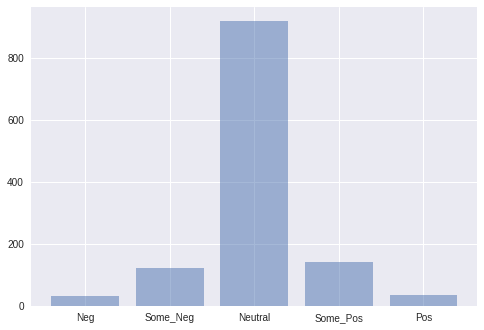

In [36]:
Label = ('Neg','Some_Neg','Neutral','Some_Pos','Pos')
y_pos = np.arange(len(Label))
Sentiment = pd.Series.value_counts(predicted_test_response,sort = False)
plt.bar(y_pos,Sentiment,align='center',alpha=0.5)
plt.xticks(y_pos,Label)
plt.show()
